In [64]:
from cleaning_module import clean_translate_reviews, clean_water_quality, clean_weather
from analysis_module import calculate_amenity_scores, compute_sentiment_scores
import pandas as pd
import math
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

**Reviews text cleaning and translate**

In [2]:
'''
input_file = 'row_data/reviews/reviews.csv'
urls_file = 'row_data/reviews/urls.csv'
output_file = 'processed_data/reviews/reviews_cleaned_translated.csv'
deepl_api_key = '631651fd-82bc-eca9-21cc-4861fe0a7a8f:fx' # From Xiao

clean_translate_reviews(input_file, urls_file, output_file, deepl_api_key)
'''

# Will need 1h to run, do not run again unless necessary

c:\Users\kalei\OneDrive\桌面\gps\Urban\fianl_data_analysis\cleanmodule.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('NA', inplace=True)


Cleaned data saved to processed_data/reviews/reviews_cleaned.csv


In [20]:
reviews = pd.read_csv('processed_data/reviews/reviews_cleaned_translated.csv').dropna(subset=['Translated_Review'])

print(len(reviews))
reviews.head()

3547


,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,...,review_questions_Kid-friendliness,review_questions_Dietary restrictions,review_questions_Parking space,review_questions_Parking options,review_questions_Parking,Location_Unique,Status,Lat,Long,Translated_Review
2,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChZDSUhNMG9nS0VJQ0FnSURaOTRXNUNREAE,CAESBkVnSUlBdw==,...,NaN,NaN,NaN,NaN,NaN,Gaasperplas,official,52.306924,4.986444,"Beautiful park, very quiet"
3,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChdDSUhNMG9nS0VJQ0FnSUNabDRxZHp3RRAB,CAESBkVnSUlCQQ==,...,NaN,NaN,NaN,NaN,NaN,Gaasperplas,official,52.306924,4.986444,Polecam
6,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChZDSUhNMG9nS0VJQ0FnSUNadHBxZEJBEAE,CAESBkVnSUlCdw==,...,NaN,NaN,NaN,NaN,NaN,Gaasperplas,official,52.306924,4.986444,Beautiful area of Amsterdam. Near Krainnest an...
8,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChZDSUhNMG9nS0VJQ0FnSURwM292Y1JBEAE,CAESBkVnSUlDUQ==,...,NaN,NaN,NaN,NaN,NaN,Gaasperplas,official,52.306924,4.986444,Lovely Lake
10,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChdDSUhNMG9nS0VJQ0FnSUNwcFotMTNRRRAB,CAESBkVnSUlDdw==,...,NaN,NaN,NaN,NaN,NaN,Gaasperplas,official,52.306924,4.986444,"Home, the lake is full of beaches, perfect for..."


**Water quality data cleaning**

In [2]:
input_file = 'row_data/water_quality/Amsterdam2007-2023_utf-8.csv'
output_file = 'processed_data/water_quality/water_quality_cleaned.csv'

clean_water_quality(input_file, output_file)

c:\Users\kalei\OneDrive\桌面\gps\Urban\fianl_data_analysis\cleanmodule.py:104: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file_path)
c:\Users\kalei\OneDrive\桌面\gps\Urban\fianl_data_analysis\cleanmodule.py:106: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('NA', inplace=True)


Cleaned data saved to processed_data/water_quality/water_quality_cleaned.csv


In [11]:
water_quality = pd.read_csv('processed_data/water_quality/water_quality_cleaned.csv')

water_quality.head()

C:\Users\kalei\AppData\Local\Temp\ipykernel_40444\1820173234.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  water_quality = pd.read_csv('processed_data/water_quality/water_quality_cleaned.csv')


,locatiecode,locatie omschrijving,locatie x,locatie y,locatie z,compartiment,datum,fewsparameter,fewsparametercode,fewsparameternaam,...,fewsparameterparameterfractie,limietsymbool,meetwaarde,eenheid,waardebewerkingsmethode,afronding,opmerkingmeting,date,lat,lon
0,BGP008,Papelaan,130712,481615,NaN,OW,3-1-2007 08:15,O2_mg/l,O2,Zuurstof (mg/l),...,NaN,NaN,6.4,mg/l,MET,Ja,NaN,2007-01-03,52.321946,5.030963
1,BGP008,Papelaan,130712,481615,NaN,OW,3-1-2007 08:15,O2_%,O2,Zuurstofverzadigingspercentage,...,NaN,NaN,49.0,%,MET,Ja,NaN,2007-01-03,52.321946,5.030963
2,BGP008,Papelaan,130712,481615,NaN,OW,3-1-2007 08:15,T_oC,T,Temperatuur (oC),...,NaN,NaN,4.5,oC,MET,Ja,NaN,2007-01-03,52.321946,5.030963
3,BGP008,Papelaan,130712,481615,NaN,OW,3-1-2007 08:15,ZICHT_m,ZICHT,Doorzicht (m),...,NaN,>,0.2,m,MET,Ja,NaN,2007-01-03,52.321946,5.030963
4,BGP010,In bak achter benzinestation aflaat stedelijk ...,131455,480719,NaN,OW,3-1-2007 08:30,O2_mg/l,O2,Zuurstof (mg/l),...,NaN,NaN,3.1,mg/l,MET,Ja,NaN,2007-01-03,52.313926,5.041924


In [12]:
unique_indicator_types = water_quality['fewsparameter'].unique()
unique_indicator_count = len(unique_indicator_types)
unique_indicator_types_list = unique_indicator_types.tolist()

unique_indicator_count, unique_indicator_types_list

(8,
 ['O2_mg/l',
  'O2_%',
  'T_oC',
  'ZICHT_m',
  'INTTNLETRCCN_nKVE/dl',
  'E_COLI_nKVE/dl',
  'BADGT_n',
  'CHLFa_ug/l_blauwalg'])

**Weather data cleaning**

In [2]:
input_file = 'row_data/weather/schiphol_KNMI_weather_data_2007_2023.txt'
output_file = 'processed_data/weather/weather_cleaned.csv'

clean_weather(input_file, output_file)

Cleaned data saved to processed_data/weather/weather_cleaned.csv


In [3]:
weather = pd.read_csv('processed_data/weather/weather_cleaned.csv')

weather.head()

'''
FG: Etmaalgemiddelde windsnelheid (in 0.1 m/s) / Daily mean windspeed (in 0.1 m/s)
TG: Etmaalgemiddelde temperatuur (in 0.1 graden Celsius) / Daily mean temperature in (0.1 degrees Celsius)
SQ: Zonneschijnduur (in 0.1 uur) berekend uit de globale straling (-1 voor <0.05 uur) / Sunshine duration (in 0.1 hour) calculated from global 
DR: Duur van de neerslag (in 0.1 uur) / Precipitation duration (in 0.1 hour)
RH: Etmaalsom van de neerslag (in 0.1 mm) (-1 voor <0.05 mm) / Daily precipitation amount (in 0.1 mm) (-1 for <0.05 mm)
PG: Etmaalgemiddelde luchtdruk herleid tot zeeniveau (in 0.1 hPa) berekend uit 24 uurwaarden / Daily mean sea level pressure (in 0.1 hPa) 
UG: Etmaalgemiddelde relatieve vochtigheid (in procenten) / Daily mean relative atmospheric humidity (in percents)
EV24: Referentiegewasverdamping (Makkink) (in 0.1 mm) / Potential evapotranspiration (Makkink) (in 0.1 mm)
'''

,date,FG,TG,SQ,DR,RH,PG,UG,EV24
0,2007-01-02,7.0,6.3,1.3,4.5,5.6,1017.9,83,0.2
1,2007-01-03,7.3,7.1,0.3,2.1,0.4,1021.4,88,0.1
2,2007-01-04,10.7,9.6,0.0,1.1,0.8,1007.7,81,0.2
3,2007-01-05,6.7,9.4,0.0,2.3,1.2,1015.8,87,0.1
4,2007-01-06,4.1,7.3,0.3,8.5,8.8,1013.7,92,0.2


**Convert OSM data to amenities score**

In [2]:
input_file = 'row_data/reviews/urls.csv'
output_file = 'processed_data/amenities_score/amenities_score.csv'
data_folder = 'row_data/OSM/output_OSM_data'

calculate_amenity_scores(input_file, output_file, data_folder)

Amenity scores saved to: processed_data/amenities_score/amenities_score.csv


In [3]:
amenities_score = pd.read_csv('processed_data/amenities_score/amenities_score.csv')

amenities_score.head()

,Location,Amenities_Score,Normalized_Amenities_Score
0,Gaasperplas,5,0.36
1,Gaasperplas strand,4,0.29
2,Playground Gaasperplaspark,7,0.50
3,Waterspeelplaats Gaasperpark,7,0.50
4,Park de Oeverlanden,4,0.29


**Get sentiment score from reviews**

In [2]:
input_file = 'processed_data/reviews/reviews_cleaned_translated.csv'
output_file = 'processed_data/sentiment_score/reviews_sentiment_score.csv'

compute_sentiment_scores(input_file, output_file)

Sentiment scores computed and saved to processed_data/sentiment_score/reviews_sentiment_score.csv


In [22]:
sentiment_score = pd.read_csv('processed_data/sentiment_score/reviews_sentiment_score.csv').dropna(subset=['Sentiment_Score'])
sentiment_score = sentiment_score[['name', 'Location_Unique', 'review_datetime_utc', 'Translated_Review', 'Sentiment_Score']]

sentiment_score.head()


,name,Location_Unique,review_datetime_utc,Translated_Review,Sentiment_Score
2,Gaasperplas,Gaasperplas,2023-10-08,"Beautiful park, very quiet",0.5994
3,Gaasperplas,Gaasperplas,2023-09-20,Polecam,0.0000
6,Gaasperplas,Gaasperplas,2023-09-10,Beautiful area of Amsterdam. Near Krainnest an...,0.7717
8,Gaasperplas,Gaasperplas,2023-08-22,Lovely Lake,0.5859
10,Gaasperplas,Gaasperplas,2023-08-07,"Home, the lake is full of beaches, perfect for...",0.5719


**Datasets linkage**

Link sentiment score with water quality

In [2]:
'''
reviews_sentiment_score_df = pd.read_csv(r'processed_data/sentiment_score/reviews_sentiment_score.csv')
water_quality_df = pd.read_csv('processed_data/water_quality/water_quality_cleaned.csv')

# Get unique items from 'fewsparameter'
unique_parameters = water_quality_df['fewsparameter'].unique()

# Initialize new columns in the reviews sentiment score dataframe
for param in unique_parameters:
    reviews_sentiment_score_df[param] = None

# Haversine_distance function
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the Haversine distance between two points on the earth.
    
    :param lat1: Latitude of the first point.
    :param lon1: Longitude of the first point.
    :param lat2: Latitude of the second point.
    :param lon2: Longitude of the second point.
    :return: Distance in kilometers.
    """
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Difference in coordinates
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c

# Function to merge data
def merge_data(reviews_df, water_quality_df, radius=1):
    total_reviews = len(reviews_df)
    last_printed_percent = 0
    
    for index1, row1 in reviews_df.iterrows():
        closest_distance = float('inf')
        closest_water_quality = None

        for index2, row2 in water_quality_df.iterrows():
            if row1['review_datetime_utc'] == row2['date']:
                distance = haversine_distance(row1['Lat'], row1['Long'], row2['lat'], row2['lon'])
                if distance <= radius and distance < closest_distance:
                    closest_distance = distance
                    closest_water_quality = row2

        if closest_water_quality is not None:
            for param in unique_parameters:
                matching_param_value = water_quality_df.loc[
                    (water_quality_df['date'] == closest_water_quality['date']) &
                    (water_quality_df['lat'] == closest_water_quality['lat']) &
                    (water_quality_df['lon'] == closest_water_quality['lon']) &
                    (water_quality_df['fewsparameter'] == param), 'meetwaarde'
                ]
                if not matching_param_value.empty:
                    reviews_df.at[index1, param] = matching_param_value.iloc[0]

        # Overall review progress update
        percent_complete = (index1 + 1) / total_reviews * 100

        if percent_complete - last_printed_percent >= 0.5:
            reviews_left = total_reviews - (index1 + 1)
            print(f"Review progress: Processed {index1 + 1}/{total_reviews} reviews. "
                  f"{reviews_left} reviews left ({percent_complete:.2f}% complete).")
            last_printed_percent = percent_complete

    return reviews_df

merged_df = merge_data(reviews_sentiment_score_df, water_quality_df)

merged_df.to_csv('merged_data/water_sentiment.csv', index=False)
'''

# Will need 3h to run, do not run again unless necessary

/var/folders/l2/6k2cs13d16xfb7mrzcmwrcv40000gn/T/ipykernel_29770/4225307395.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  water_quality_df = pd.read_csv('processed_data/water_quality/water_quality_cleaned.csv')


Review progress: Processed 42/8286 reviews. 8244 reviews left (0.51% complete).
Review progress: Processed 84/8286 reviews. 8202 reviews left (1.01% complete).
Review progress: Processed 126/8286 reviews. 8160 reviews left (1.52% complete).
Review progress: Processed 168/8286 reviews. 8118 reviews left (2.03% complete).
Review progress: Processed 210/8286 reviews. 8076 reviews left (2.53% complete).
Review progress: Processed 252/8286 reviews. 8034 reviews left (3.04% complete).
Review progress: Processed 294/8286 reviews. 7992 reviews left (3.55% complete).
Review progress: Processed 336/8286 reviews. 7950 reviews left (4.06% complete).
Review progress: Processed 378/8286 reviews. 7908 reviews left (4.56% complete).
Review progress: Processed 420/8286 reviews. 7866 reviews left (5.07% complete).
Review progress: Processed 462/8286 reviews. 7824 reviews left (5.58% complete).
Review progress: Processed 504/8286 reviews. 7782 reviews left (6.08% complete).
Review progress: Processed 546

In [6]:
water_sentiment = pd.read_csv('merged_data/water_sentiment.csv')

e_coli = water_sentiment.dropna(subset=['E_COLI_nKVE/dl'])

print(len(e_coli))
e_coli.head()

266


C:\Users\kalei\AppData\Local\Temp\ipykernel_44524\533866176.py:1: DtypeWarning: Columns (19,21,40,41,43,49) have mixed types. Specify dtype option on import or set low_memory=False.
  water_sentiment = pd.read_csv('merged_data/water_sentiment.csv')


,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,...,Cleaned_Review,Sentiment_Score,O2_mg/l,O2_%,T_oC,ZICHT_m,INTTNLETRCCN_nKVE/dl,E_COLI_nKVE/dl,BADGT_n,CHLFa_ug/l_blauwalg
3,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChdDSUhNMG9nS0VJQ0FnSUNabDRxZHp3RRAB,CAESBkVnSUlCQQ==,...,polecam,0.0000,NaN,NaN,18.4,1.0,390.0,440.0,0.0,NaN
8,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChZDSUhNMG9nS0VJQ0FnSURwM292Y1JBEAE,CAESBkVnSUlDUQ==,...,lovely lake,0.5859,NaN,NaN,22.5,1.0,20.0,670.0,7.0,NaN
9,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChdDSUhNMG9nS0VJQ0FnSUNjMzdTdnJ3RRAB,CAESBkVnSUlDZw==,...,NaN,NaN,NaN,NaN,22.5,1.0,20.0,670.0,7.0,NaN
10,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChdDSUhNMG9nS0VJQ0FnSUNwcFotMTNRRRAB,CAESBkVnSUlDdw==,...,"home, the lake is full of beaches, perfect for...",0.5719,NaN,NaN,18.0,1.0,60.0,350.0,0.0,2.0
72,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChZDSUhNMG9nS0VJQ0FnSURLN2NPT0FREAE,CAESBkVnSUlTUQ==,...,NaN,NaN,NaN,NaN,13.6,0.3,410.0,140.0,0.0,NaN


**Merge weather and amenities scores with water quality and sentiment**

In [4]:
merged_water_sentiment_df = pd.read_csv('merged_data\water_sentiment.csv')
weather_df = pd.read_csv('processed_data\weather\weather_cleaned.csv')
amenities_score_df = pd.read_csv(r'processed_data\amenities_score\amenities_score.csv')

total_reviews = len(merged_water_sentiment_df)
percent_interval = 10
next_percent_threshold = percent_interval

# Merge with Weather Data
for index, row in merged_water_sentiment_df.iterrows():
    matching_weather = weather_df[weather_df['date'] == row['review_datetime_utc']]
    if not matching_weather.empty:
        for col in weather_df.columns:
            if col != 'date':
                merged_water_sentiment_df.at[index, col] = matching_weather.iloc[0][col]

    # Progress update
    percent_complete = (index + 1) / total_reviews * 100
    if percent_complete >= next_percent_threshold:
        reviews_left = total_reviews - (index + 1)
        print(f"Weather merging progress: Processed {index + 1}/{total_reviews} reviews. {reviews_left} reviews left ({percent_complete:.2f}% complete).")
        next_percent_threshold += percent_interval
        
next_percent_threshold = percent_interval

# Merge with Amenities Score Data
for index, row in merged_water_sentiment_df.iterrows():
    matching_amenity = amenities_score_df[amenities_score_df['Location'] == row['name']]
    if not matching_amenity.empty:
        for col in amenities_score_df.columns:
            if col != 'Location':
                merged_water_sentiment_df.at[index, col] = matching_amenity.iloc[0][col]

    # Progress update
    percent_complete = (index + 1) / total_reviews * 100
    if percent_complete >= next_percent_threshold:
        reviews_left = total_reviews - (index + 1)
        print(f"Amenities score merging progress: Processed {index + 1}/{total_reviews} reviews. {reviews_left} reviews left ({percent_complete:.2f}% complete).")
        next_percent_threshold += percent_interval

merged_water_sentiment_df.to_csv('merged_data\merged_all.csv', index=False)

C:\Users\kalei\AppData\Local\Temp\ipykernel_16428\2553892588.py:1: DtypeWarning: Columns (19,21,40,41,43,49) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_water_sentiment_df = pd.read_csv('merged_data\water_sentiment.csv')


Weather merging progress: Processed 829/8286 reviews. 7457 reviews left (10.00% complete).
Weather merging progress: Processed 1658/8286 reviews. 6628 reviews left (20.01% complete).
Weather merging progress: Processed 2486/8286 reviews. 5800 reviews left (30.00% complete).
Weather merging progress: Processed 3315/8286 reviews. 4971 reviews left (40.01% complete).
Weather merging progress: Processed 4143/8286 reviews. 4143 reviews left (50.00% complete).
Weather merging progress: Processed 4972/8286 reviews. 3314 reviews left (60.00% complete).
Weather merging progress: Processed 5801/8286 reviews. 2485 reviews left (70.01% complete).
Weather merging progress: Processed 6629/8286 reviews. 1657 reviews left (80.00% complete).
Weather merging progress: Processed 7458/8286 reviews. 828 reviews left (90.01% complete).
Weather merging progress: Processed 8286/8286 reviews. 0 reviews left (100.00% complete).
Amenities score merging progress: Processed 829/8286 reviews. 7457 reviews left (10.

**Data preparation for machine learning**

In [65]:
merged_all = pd.read_csv('merged_data\merged_all.csv').dropna(subset=['Translated_Review'])

columns_to_drop = ['query', 'google_id', 'place_id', 'location_link', 'reviews_link', 'rating', 
                   'review_id', 'review_pagination_id', 'author_link', 'author_title', 'author_id',
                   'author_image', 'review_text', 'review_img_url', 'review_img_urls', 'review_questions',
                   'review_photo_ids', 'owner_answer', 'owner_answer_timestamp', 
                   'owner_answer_timestamp_datetime_utc', 'review_link', 'review_rating', 'review_timestamp', 
                   'review_likes', 'reviews_id', 'reviews_per_score_1', 'reviews_per_score_2', 
                   'reviews_per_score_3', 'reviews_per_score_4', 'reviews_per_score_5', 'reviews_per_score', 
                   'review_questions_Playground', 'review_questions_Restrooms', 'review_questions_Dog-friendliness', 
                   'review_questions_Picnic area', 'review_questions_None', 'review_questions_Features', 
                   'review_questions_Meal type', 'review_questions_Price per person', 'review_questions_Food', 
                   'review_questions_Service', 'review_questions_Atmosphere', 'review_questions_Recommended dishes', 
                   'review_questions_Vegetarian options', 'review_questions_Kid-friendliness', 'review_questions_Dietary restrictions',
                   'review_questions_Parking space', 'review_questions_Parking options', 'review_questions_Parking', 'Cleaned_Review', 
                   'BADGT_n', 'PG', 'UG', 'EV24']

merged_all_cleaned = merged_all.drop(columns=columns_to_drop)

merged_all_cleaned.to_csv('merged_data\merged_all_cleaned.csv', index=False)

C:\Users\kalei\AppData\Local\Temp\ipykernel_46360\2595295055.py:1: DtypeWarning: Columns (19,21,40,41,43,49) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_all = pd.read_csv('merged_data\merged_all.csv').dropna(subset=['Translated_Review'])


Impute missing values

In [66]:
data = pd.read_csv('merged_data\merged_all_cleaned.csv')

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

categorical_cols = categorical_cols.drop('name')

# Impute NA in numeric columns
iterative_imputer = IterativeImputer(random_state=0)
numeric_data_for_imputation = data[numeric_cols]
imputed_numeric_data = iterative_imputer.fit_transform(numeric_data_for_imputation)

imputed_numeric_df = pd.DataFrame(imputed_numeric_data, columns=numeric_cols)

# Fill missing values with a placeholder and convert categories to numbers
data[categorical_cols] = data[categorical_cols].fillna('missing')
for col in categorical_cols:
    data[col] = OrdinalEncoder().fit_transform(data[[col]])

# Combine the data back together
final_imputed_df = pd.concat([imputed_numeric_df, data[categorical_cols], data['name'].reset_index(drop=True)], axis=1)

final_imputed_df.to_csv('imputed_data/imputed_data.csv', index=False)

Clustering

c:\Users\kalei\anaconda3\envs\py311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kalei\anaconda3\envs\py311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kalei\anaconda3\envs\py311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kalei\anaconda3\envs\py311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will chang

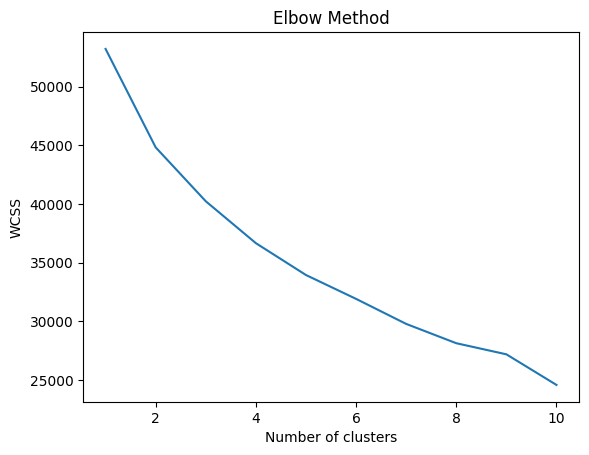

c:\Users\kalei\anaconda3\envs\py311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


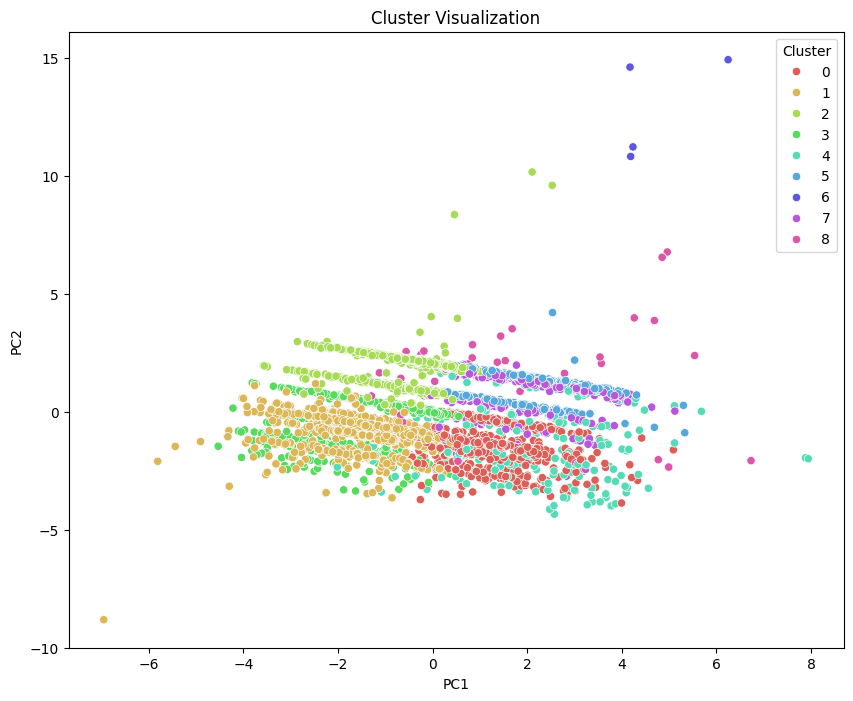

             reviews        Lat      Long  Sentiment_Score    O2_mg/l  \
Cluster                                                                 
0         729.726766  52.350919  4.885607         0.528870   8.574280   
1         549.324059  52.366008  4.877578         0.538647   6.427995   
2        1754.540155  52.382033  4.869988         0.579907   6.521803   
3         824.324444  52.328541  4.891848         0.488258   6.523503   
4         966.107317  52.354814  4.883099         0.533251   7.033715   
5        1803.401575  52.383717  4.875711         0.557325   8.398267   
6        1229.000000  52.381807  4.867258         0.783800   5.417306   
7        1663.890282  52.376912  4.867685         0.585960   7.370111   
8         882.833333  52.346444  4.867635         0.568017  11.381667   

               O2_%       T_oC   ZICHT_m  INTTNLETRCCN_nKVE/dl  \
Cluster                                                          
0         72.979084  10.283342  1.091530            195.246102  

In [68]:
data = pd.read_csv('imputed_data\imputed_data.csv')

# Exclude irrelevant features
features = data.drop(['Sentiment_Score', 'Lat', 'Long', 'Amenities_Score', 'name', 'review_datetime_utc', 'Location_Unique', 'Translated_Review'], axis=1)
target = data['Sentiment_Score']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the number of k based on the elbow method
k = 9
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(features_scaled)

clusters = kmeans.labels_

# Assign cluster labels to the data
data['Cluster'] = clusters

# Use PCA to reduce the dimensionality for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Add the PCA components for visualization
data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data, palette=sns.color_palette('hls', n_colors=k))
plt.title('Cluster Visualization')
plt.show()

numeric_cols_for_analysis = data.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_for_analysis = numeric_cols_for_analysis.drop(['PC1', 'PC2'])  # Drop the PCA components from analysis

cluster_analysis = data.groupby('Cluster')[numeric_cols_for_analysis].mean()

print(cluster_analysis)

for cluster in sorted(data['Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    print(data.loc[data['Cluster'] == cluster, 'name'])
    
data[['name', 'Cluster', 'PC1', 'PC2']].to_csv('clustering_results_with_pca.csv', index=False)

# cluster_analysis.to_csv('cluster_analysis_summary.csv', index=True)

Random Forest

In [82]:
data = pd.read_csv('merged_data\merged_all_cleaned.csv')

data['Status'] = data['Status'].apply(lambda x: 1 if x == 'official' else 0)

iterative_imputer = IterativeImputer(max_iter=10, random_state=0)

data_numeric = data.drop(columns=['Status', 'reviews', 'Lat', 'Long', 'Amenities_Score', 'name', 'review_datetime_utc', 'Location_Unique', 'Translated_Review'])
data_imputed = pd.DataFrame(iterative_imputer.fit_transform(data_numeric), columns=data_numeric.columns)

data_imputed['Status'] = data['Status'].reset_index(drop=True)
data = data_imputed

c:\Users\kalei\anaconda3\envs\py311\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [83]:
X = data.drop(['Sentiment_Score'], axis=1)
y = data['Sentiment_Score']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = rf_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Evaluating feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))

feature_importances.sort_values(ascending=False).to_csv('feature_importances.csv')

print(f"Number of training data points: {len(X_train)}")
print(f"Number of testing data points: {len(X_test)}")

Mean Squared Error: 0.016979307885454927
E_COLI_nKVE/dl                0.637586
O2_mg/l                       0.059441
T_oC                          0.057680
INTTNLETRCCN_nKVE/dl          0.053934
FG                            0.045057
TG                            0.043296
SQ                            0.033173
ZICHT_m                       0.022161
CHLFa_ug/l_blauwalg           0.019402
O2_%                          0.013636
RH                            0.005234
DR                            0.004784
Normalized_Amenities_Score    0.003273
Status                        0.001342
dtype: float64
Number of training data points: 2837
Number of testing data points: 710
